<a href="https://colab.research.google.com/github/jdmartinev/IMDBAnalytics/blob/main/IMDBAnalyticsColab/IMDBAnalyticsColab_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial

En este tutorial, analizará una base de datos de películas *IMDb Movies dataset* para aprender conceptos y procedimientos básicos utilizados en el análisis de datos. Al final, usted tendrá la capacidad de:

-  Importar y explorar datos
-  Realizar limpieza de datos
-  Utilizar Pandas/Plotly para crear histogramas que le permitan analizar la distribución de los datos
-  Creargráficos de líneas y de barras (_line charts_ & _bar charts_) para visualizar datos
-  Utilizar Pandas y Plotly para crear gráficas de dispersión (_scatter plots_) para realizar análisis de correlación


## Descarga de datos

Lo primero que hará será descargar los datos con los que va a trabajar:

- Tabla de películas (archivo csv).
- _Shapefile_ (archivo .shp y archivos auxiliares) con la información necesaria para graficar mapas. De forma resumida, este archivo almacena información geométrica en forma de líneas o polígonos. En este caso partícular, el _shapefile_ tendrá la geometría de los países que nos servirá para pintar en el mapa datos relevantes extraídos de la información contenida en la base de datos de películas.  

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab.


In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"

--2023-03-01 15:05:36--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 142.250.1.139, 142.250.1.100, 142.250.1.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.1.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rh15v2dcf47o9bvqnpiajprv7h9pqfh6/1677683100000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=6ccaae5d-e798-4cfa-be61-16ab5e421bb6 [following]
--2023-03-01 15:05:41--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rh15v2dcf47o9bvqnpiajprv7h9pqfh6/1677683100000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=6ccaae5d-e798-4cfa-be61-16ab5e421bb6
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 64.233.182.132, 2607:f8b0:4001

### Importar las librerías necesarias

Importe las librerías que le servirán para el procesamiento y visualización de datos. La libreia _geopandas_, que sirve para el procesamiento de archivos con información geográfica (_shapefiles_) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 68.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px

## **1. Procesamiento básico**

En este primer paso, cargará la base de datos (archivo .csv) a un _dataframe_ de pandas y utilizará algunas funciones de la librería que le ayudarán a tener información básica de los datos. De forma resumida, un _dataframe_ de pandas es una estructura de datos bidimensional en la que los datos se organizan en filas y columnas. Es similar a una hoja de cálculo en Excel, donde cada columna representa una variable y cada fila representa una observación.



In [4]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv') #Cargar el archivo csv al dataframe df
df.head(5) #Mostrar las primeras 5 filas de la tabla 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.shape #Tamaño de la tabla (df.shape[0] es el número de filas y df.shape[1] es el número de columnas)

(5043, 28)

In [7]:
df.dtypes #Muestra el tipo de dato que se almacena en cada columna de la tabla

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

Podemos acceder a las filas y columnas del _dataframe_ de las siguientes formas: 

- Acceder a todas las filas en la columna _director name_
```python 
df["director_name"] 
df.director_name
```
La segunda forma solo funciona si el nombre de la columna no tiene espacios

- Acceder a unas filas específicas de la columna _director name_
```python 
df.loc[0,"director_name"] 
df.loc[0:10,"director_name"]
```

- Acceder a filas y columnas específicas
```python 
df.loc[0:10,["director_name","movie_title"]]
df.iloc[0:10,[0,1]] 
```
El método ```loc``` indexa las columnas por su nombre, mientas que el método ```iloc``` indexa las columnas por su posición.

In [ ]:
df.loc[0:10,["director_name","movie_title"]]

In [ ]:
df.iloc[0:10,[0,1]] 

## **2. Preparación de datos**

Remueva algunas columnas que no son importantes para el análisis que se va a realizar.

- _movie_imdb_link_
- _num_critic_for_reviews_
- _genre_

El método ```drop``` permite hacer este proceso. El parámetro ```axis = 1``` se utiliza para que elimine información de las columnas, ```columns``` especifica las columnas a remover, e ```inplace = True``` se utiliza para que la modificación hecha se almacene en la varianle ```df``` sin necesidad de hacer una nueva asignación de variables. 


In [ ]:
df.drop(axis = 1, columns = ["movie_imdb_link","num_critic_for_reviews"],inplace = True)
df.head(5) #Mostrar de nuevo las 5 primeras filas para corroborar que se eliminaron las columnas 

Ejercicio: Remover la columna faltante

In [ ]:
#Código del ejercicio

Muestre las columnas como una lista para corroborar que las columnas no deseadas se eliminaron.

In [ ]:
list(df) 

Revise de nuevo el tamaño del dataframe. Debe ser diferente al tamaño inicial

In [ ]:
df.shape 

La columna _title_year_ almacena valores de tipo _float_. Sin embargo, los años se deben manejar como números enteros. Haga esta modificación utilizando el método ```astype```. Este método no permite utilizar el parámetro ```inplace```, por lo que es necesario hacer una re-asignación de la variable _df_.

In [ ]:
df['title_year'] = df['title_year'].astype("Int64")
df['title_year']

Cambie el nombre de la columna _gross_ a _movie_income_ utliando el método ```rename```

In [ ]:
rename_dict = {"gross":"movie_income", "language":"Language"}
df.rename(columns = rename_dict,inplace = True)

Ejericio: Cambie el nombre de la variable _budget_ a _movie_budget_

In [ ]:
#Código del ejercicio

## **3. Análisis de datos**

Para el análisis de datos utilizará diferentes tipos de figuras. Empezará con histogramas. Un histograma es una representación gráfica de la distribución de frecuencias de un conjunto de datos numéricos. En un histograma, se dividen los datos en una serie de "bins" o "intervalos", y se cuenta la frecuencia de observaciones que caen en cada bin. Luego, se grafica la frecuencia de cada bin en el eje vertical y el valor de cada bin en el eje horizontal, lo que permite visualizar la forma y la dispersión de la distribución de los datos.

En un histograma, la altura de cada barra representa la frecuencia de los datos que caen en ese bin. Los bins pueden ser de igual ancho (por ejemplo, cada bin puede representar un intervalo de 10 unidades) o de ancho variable (por ejemplo, para representar intervalos de mayor o menor densidad de datos).

Visualice la distribución de la columna _duration_ utilizando histogramas. Para esto utilizará el método ```hist```, el parámetro ```bins``` permitirá definir en cuántos intervalos se analizará la frecuencia de repeticiones de eventos, en este caso, duración de las películas. Se almacena la figura en la variable ```ax```, lo que permite agregar información adicional para su interpretación. en esta figura puede observar que la mayoría de películas duran aproximadamente 100 minutos.



Text(0, 0.5, 'Counts')

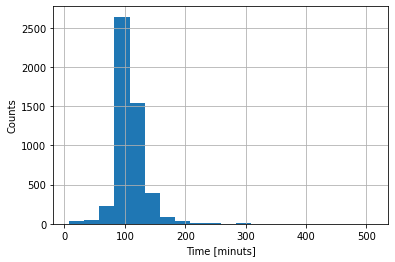

In [12]:
ax = df["duration"].hist(bins = 20)
ax.set_xlabel('Time [mins]')
ax.set_ylabel('Counts')

Hará la misma figura utilizando la librería _plotly express_

In [14]:
fig = px.histogram(df, x="duration",nbins=40,labels={'duration':'Time [mins] '})
fig.show()

Ejercicio: Cree un histograma para ver la distribución de la columna _imdb_score_


In [ ]:
#Código del ejercicio

Puede hacer consultas con respecto a alguna variable. Por ejemplo, filtre las película que tengan un _imdb_score_ menor que 4

In [ ]:
df['imdb_score'] < 4
#df.imdb_score < 4 #Esta línea hace lo mismo

El resultado es un arreglo unidimensional de pandas de tipo _series_ (similar a un _dataframe_ pero con una sola columna) que va a tomar el valor ```True``` en las filas en las que la condición se cumple y ````False``` en las demás filas. Este nuevo arreglo se puede almacenar en una nueva variable o se puede utilizar para indexar el _dataframe_. En este caso, creará un nuevo _dataframe_ con nombre _df_low_score_ que tendrá todas las columnas de _df_ pero únicamente las filas que cumplen con la condición.  

In [ ]:
index = df['imdb_score'] < 4
df_low_score = df[index]
df_low_score

In [ ]:
#esta celda es una forma diferente de hacer lo mismo
df_low_score = df[df['imdb_score'] < 4]
df_low_score

Revise que en verdad las películas en este nuevo _dataframe_ tengan un _imdb_score_ menor a 4

In [ ]:
df_low_score.loc[:,['movie_title','imdb_score']]

Ejercicio: Revise la distribución de la columna _imdb_score_ de las películas producidas en USA utilizando histogramas. Si es necesario, cree _dataframes_ que le ayuden a resolver la tarea.

In [ ]:
#Código del ejercicio